# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Reading The Dataset

In [2]:
df = pd.read_csv('houses_with_categories.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,house-width-category,tense-category
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,wide,very old
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,wide,very old
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,medium,very old
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,wide,old
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,wide,old


In [4]:
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,house-width-category,tense-category
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,0,2009,0,98103,47.6993,-122.346,1530,1509,wide,new
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,0,2014,0,98146,47.5107,-122.362,1830,7200,wide,new
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,0,2009,0,98144,47.5944,-122.299,1020,2007,medium,new
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,0,2004,0,98027,47.5345,-122.069,1410,1287,wide,new
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,0,2008,0,98144,47.5941,-122.299,1020,1357,medium,new


In [5]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'house-width-category',
       'tense-category'],
      dtype='object')

# Data Cleaning

In [6]:
df.dtypes

id                        int64
date                     object
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
house-width-category     object
tense-category           object
dtype: object

In [7]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [8]:
df.dtypes

id                               int64
date                    datetime64[ns]
price                          float64
bedrooms                         int64
bathrooms                      float64
sqft_living                      int64
sqft_lot                         int64
floors                         float64
waterfront                       int64
view                             int64
condition                        int64
grade                            int64
sqft_above                       int64
sqft_basement                    int64
yr_built                         int64
yr_renovated                     int64
zipcode                          int64
lat                            float64
long                           float64
sqft_living15                    int64
sqft_lot15                       int64
house-width-category            object
tense-category                  object
dtype: object

In [9]:
mean_price = df['price'].mean() 
df['price'].fillna(value=mean_price, inplace=True) 

In [10]:
df['price'].isnull().sum()

0

# Data Visualization

<Axes: xlabel='price', ylabel='Count'>

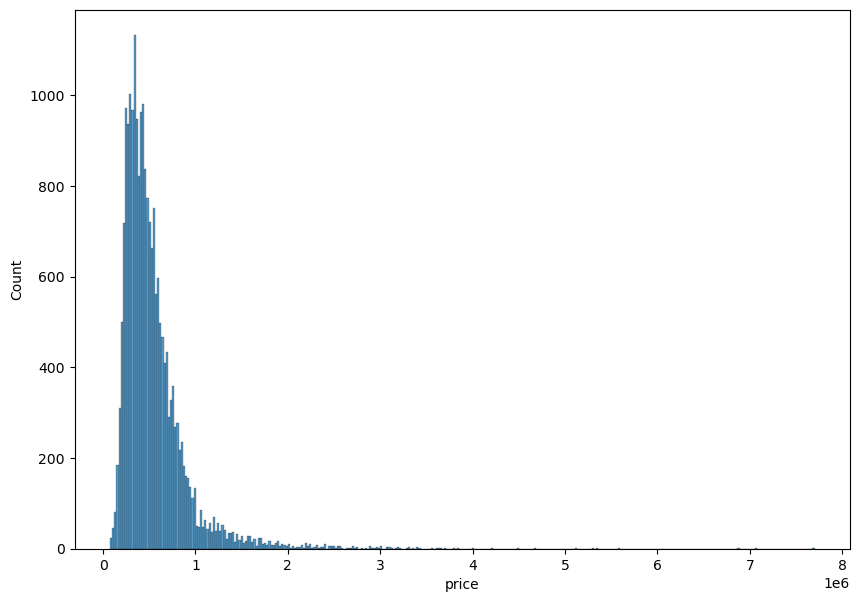

In [11]:
#What is the range of the prices of the units?
plt.figure(figsize=(10,7))
sns.histplot(df['price'])

<Axes: xlabel='sqft_above', ylabel='price'>

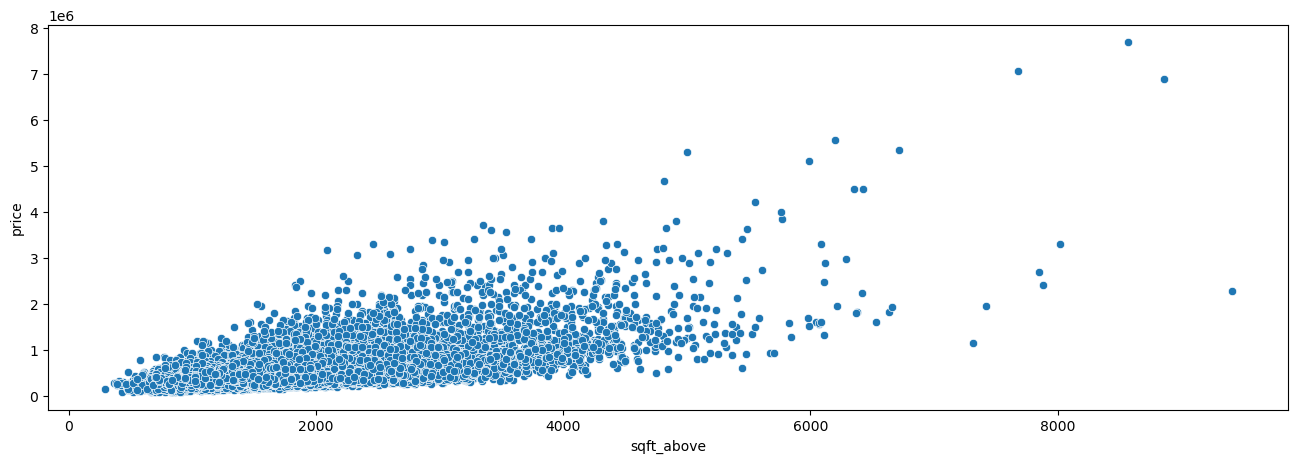

In [12]:
#Relation between sqft_above and price
fig = plt.figure(figsize=(16,5))
sns.scatterplot(x=df['sqft_above'], y=df['price'])

<Axes: xlabel='yr_built', ylabel='price'>

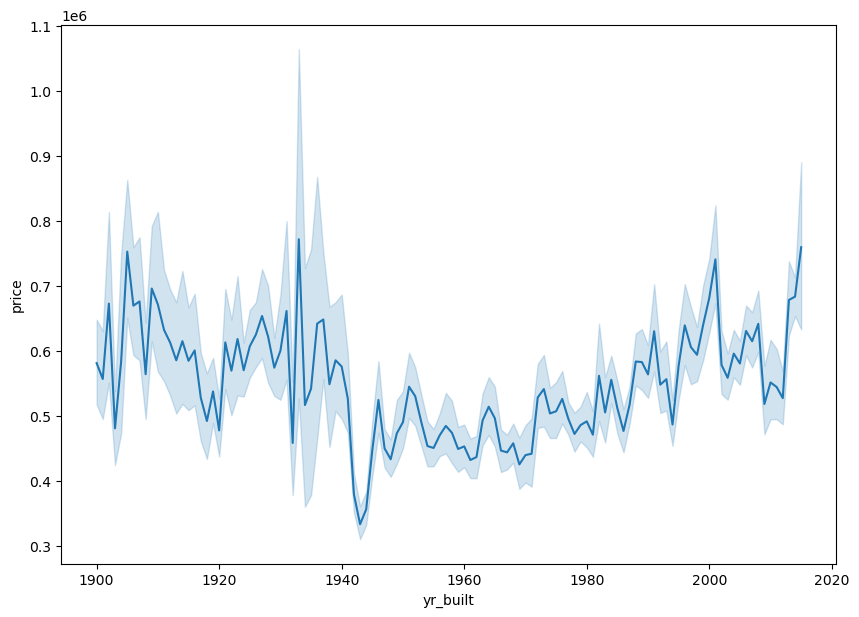

In [13]:
# Relation between the year in which th unit was built and its price
plt.figure(figsize=(10, 7))
sns.lineplot(x='yr_built', y='price', data=df)

Text(0, 0.5, 'price')

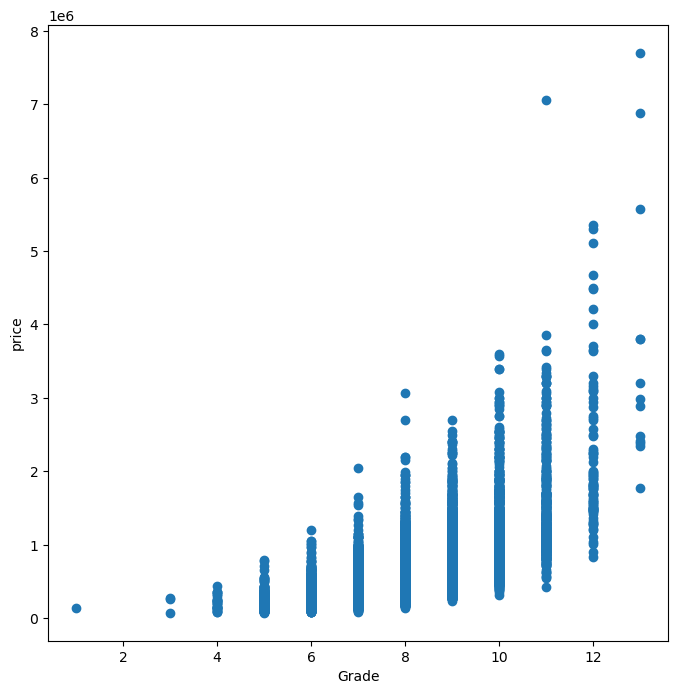

In [14]:
# Relation between grade and price(How grade affects the price)
fig, ax = plt.subplots(figsize = (8, 8))
plt.scatter(df['grade'], df['price'])
plt.xlabel('Grade')
plt.ylabel('price')

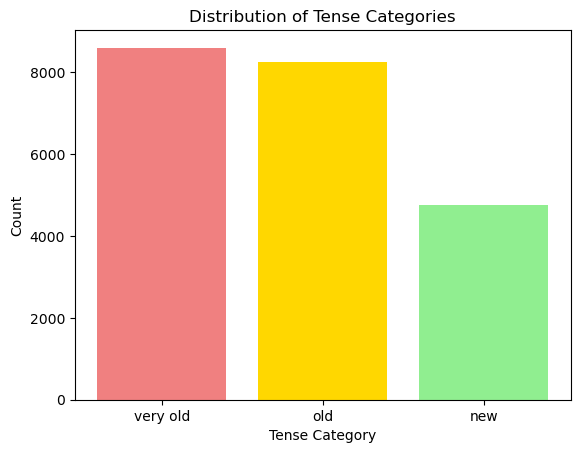

In [15]:
# Count occurrences of each category
tense_category_counts = df['tense-category'].value_counts()

# Create a bar chart
fig, ax = plt.subplots()
ax.bar(tense_category_counts.index, tense_category_counts.values, color=['lightcoral', 'gold', 'lightgreen'])

# Add labels and title
ax.set_xlabel('Tense Category')
ax.set_ylabel('Count')
ax.set_title('Distribution of Tense Categories')

# Display the chart
plt.show()

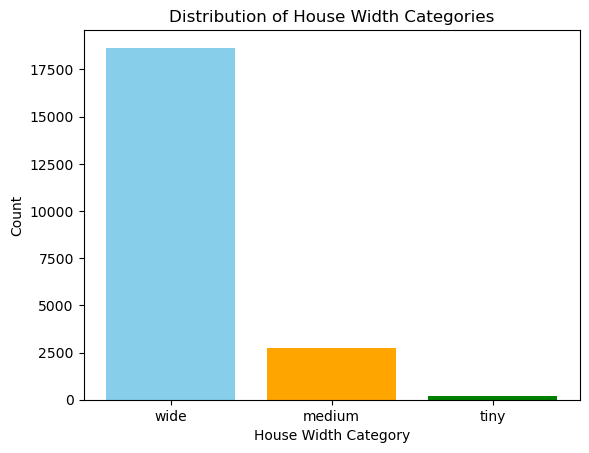

In [16]:
category_counts = df['house-width-category'].value_counts()

# Create a bar chart
fig, ax = plt.subplots()
ax.bar(category_counts.index, category_counts.values, color=['skyblue', 'orange', 'green'])

# Add labels and title
ax.set_xlabel('House Width Category')
ax.set_ylabel('Count')
ax.set_title('Distribution of House Width Categories')

# Show the plot
plt.show()

# Data Pre-Processing

In [17]:
df = df.drop(columns=['id'])

In [18]:
df.var()

C:\Users\PC\AppData\Local\Temp\ipykernel_15920\1568254755.py:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.var()


price            1.347824e+11
bedrooms         8.650150e-01
bathrooms        5.931513e-01
sqft_living      8.435337e+05
sqft_lot         1.715659e+09
floors           2.915880e-01
waterfront       7.485226e-03
view             5.872426e-01
condition        4.234665e-01
grade            1.381703e+00
sqft_above       6.857347e+05
sqft_basement    1.958727e+05
yr_built         8.627973e+02
yr_renovated     1.613462e+05
zipcode          2.862788e+03
lat              1.919990e-02
long             1.983262e-02
sqft_living15    4.697612e+05
sqft_lot15       7.455182e+08
dtype: float64

In [19]:
df2 = df.copy()

In [20]:
columns_to_normalize = ['sqft_lot', 'sqft_lot15', 'sqft_living', 'sqft_above', 'sqft_living15', 'sqft_basement']
df2[columns_to_normalize] = df2[columns_to_normalize].apply(lambda x: np.log1p(x))

In [21]:
df2.var()

C:\Users\PC\AppData\Local\Temp\ipykernel_15920\1869239109.py:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2.var()


price            1.347824e+11
bedrooms         8.650150e-01
bathrooms        5.931513e-01
sqft_living      1.802522e-01
sqft_lot         8.141229e-01
floors           2.915880e-01
waterfront       7.485226e-03
view             5.872426e-01
condition        4.234665e-01
grade            1.381703e+00
sqft_above       1.826377e-01
sqft_basement    1.005285e+01
yr_built         8.627973e+02
yr_renovated     1.613462e+05
zipcode          2.862788e+03
lat              1.919990e-02
long             1.983262e-02
sqft_living15    1.071500e-01
sqft_lot15       6.608495e-01
dtype: float64

<Axes: >

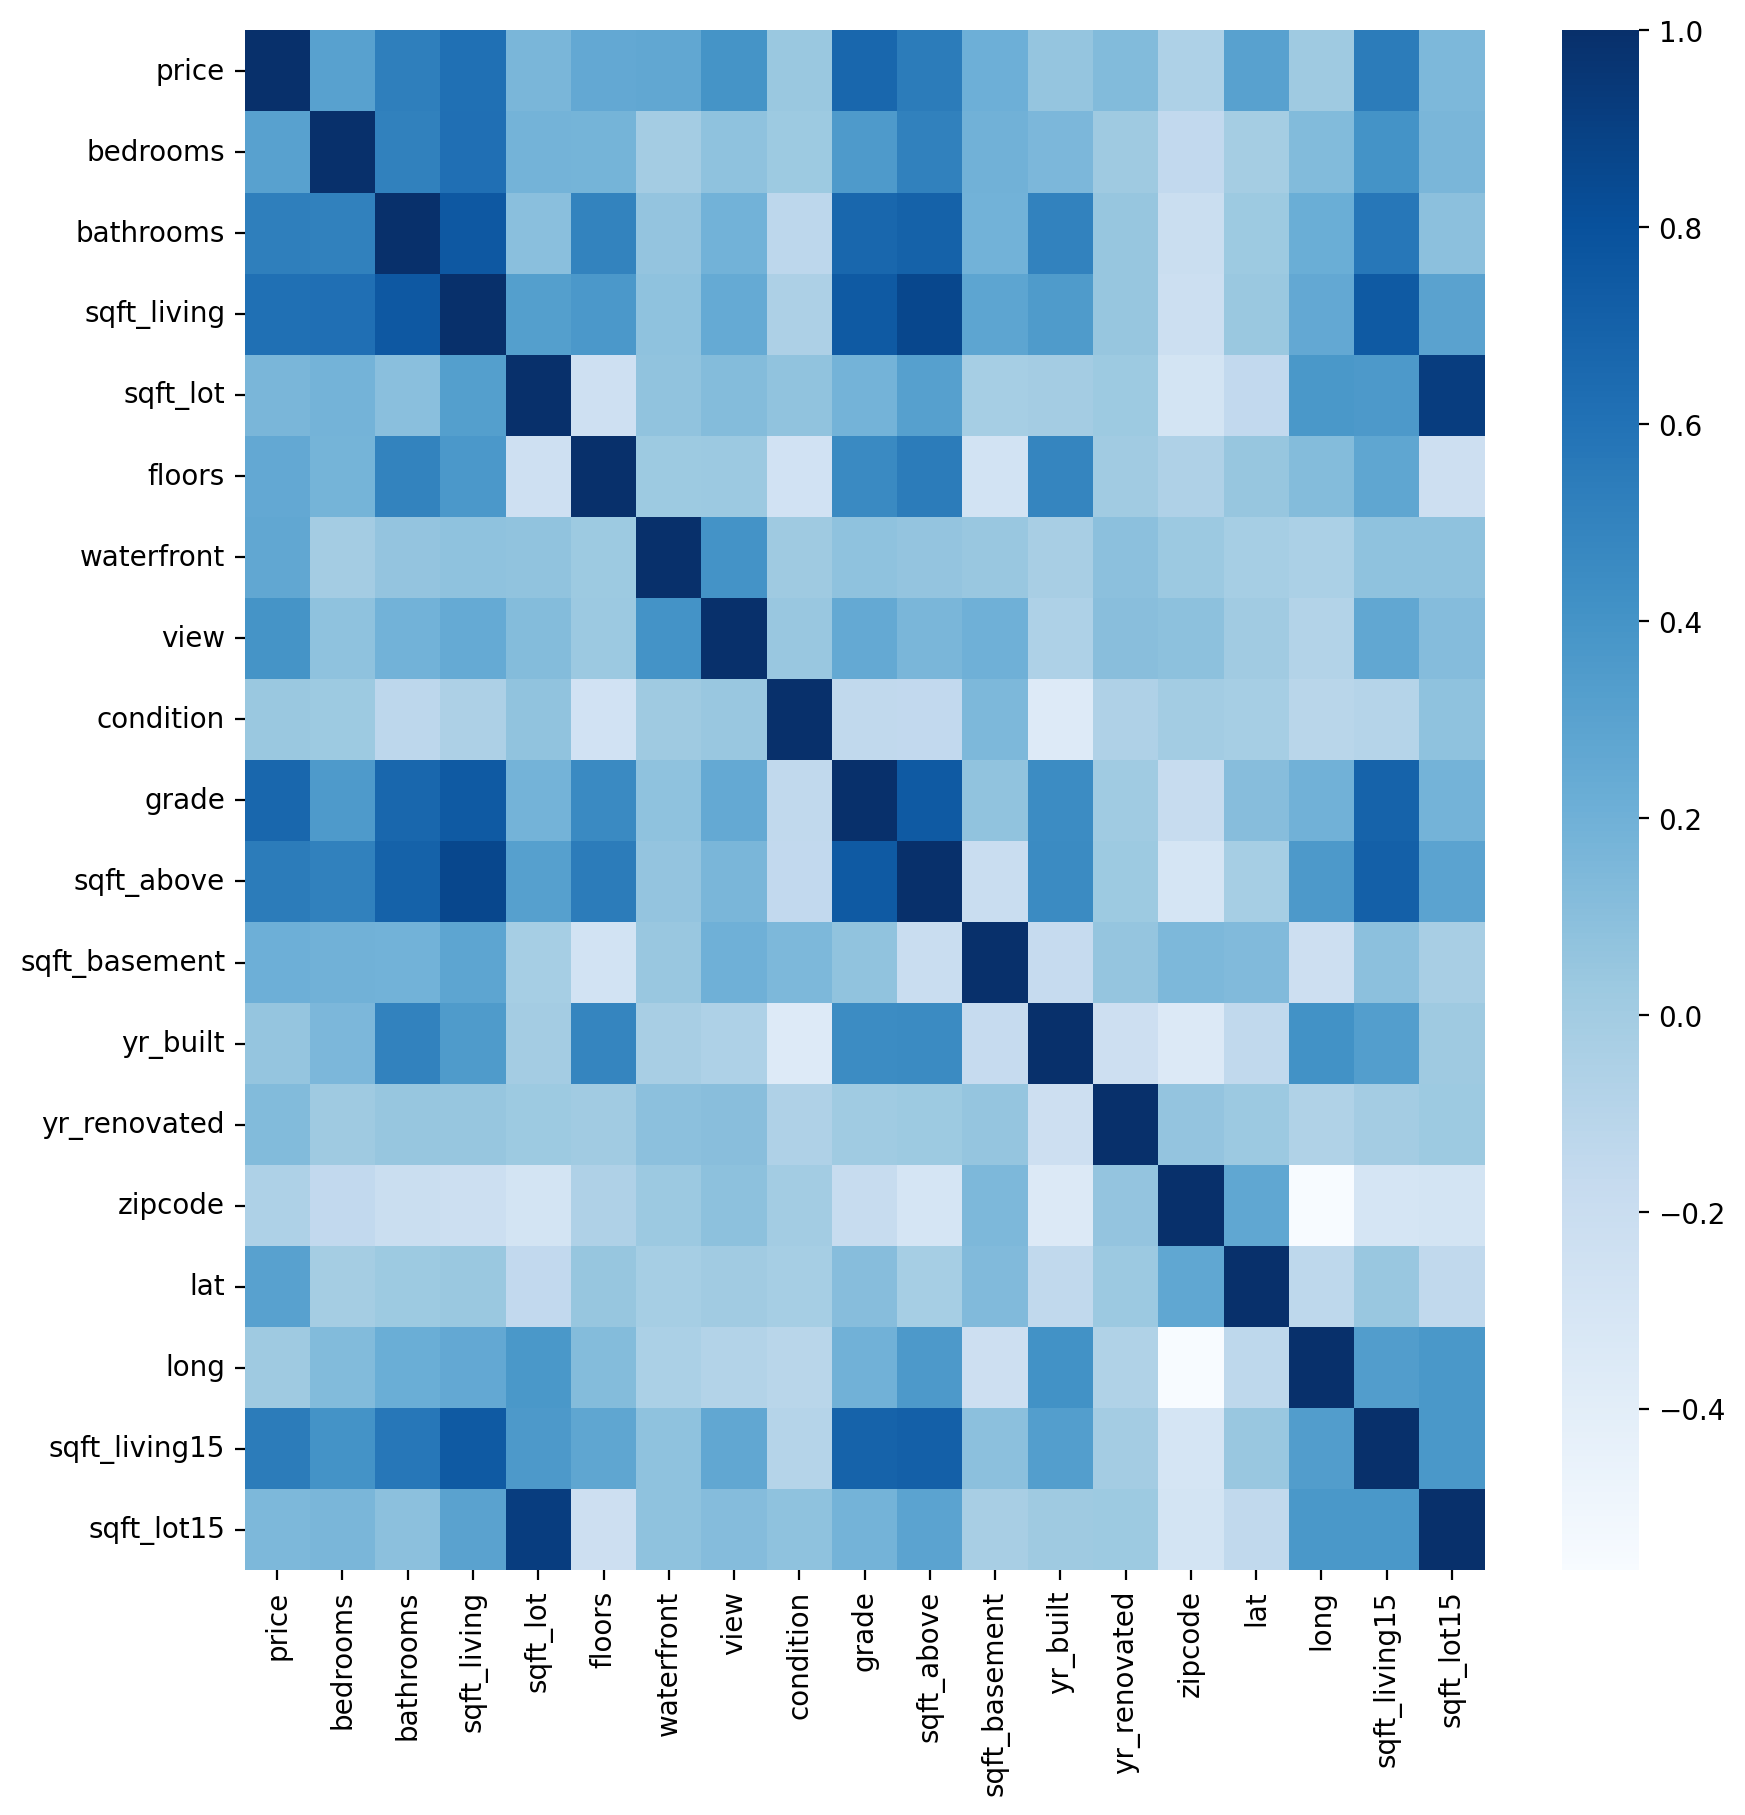

In [22]:
corr = df2.corr(numeric_only=True)
plt.figure(figsize=(10,10), dpi=200)
sns.heatmap(corr, cmap="Blues")

In [23]:
correlation=corr["price"].apply(abs).sort_values(ascending=False).reset_index()
print(correlation.shape)
correlation

(19, 2)


,index,price
0,price,1.000000
1,grade,0.667434
2,sqft_living,0.611757
3,sqft_living15,0.544014
4,sqft_above,0.542774
5,bathrooms,0.525138
6,view,0.397293
7,bedrooms,0.308350
8,lat,0.307003
9,waterfront,0.266369


In [24]:
def handle_outliers_iqr(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = dataframe[(dataframe[column] < lower) | (dataframe[column] > upper)]
    dataframe.loc[(dataframe[col]>upper,col)]=upper
    dataframe.loc[(dataframe[col]<lower,col)]=lower 
    return dataframe


for col in df2.select_dtypes(include=["number"]).columns :
    df2 = handle_outliers_iqr(df2, col)

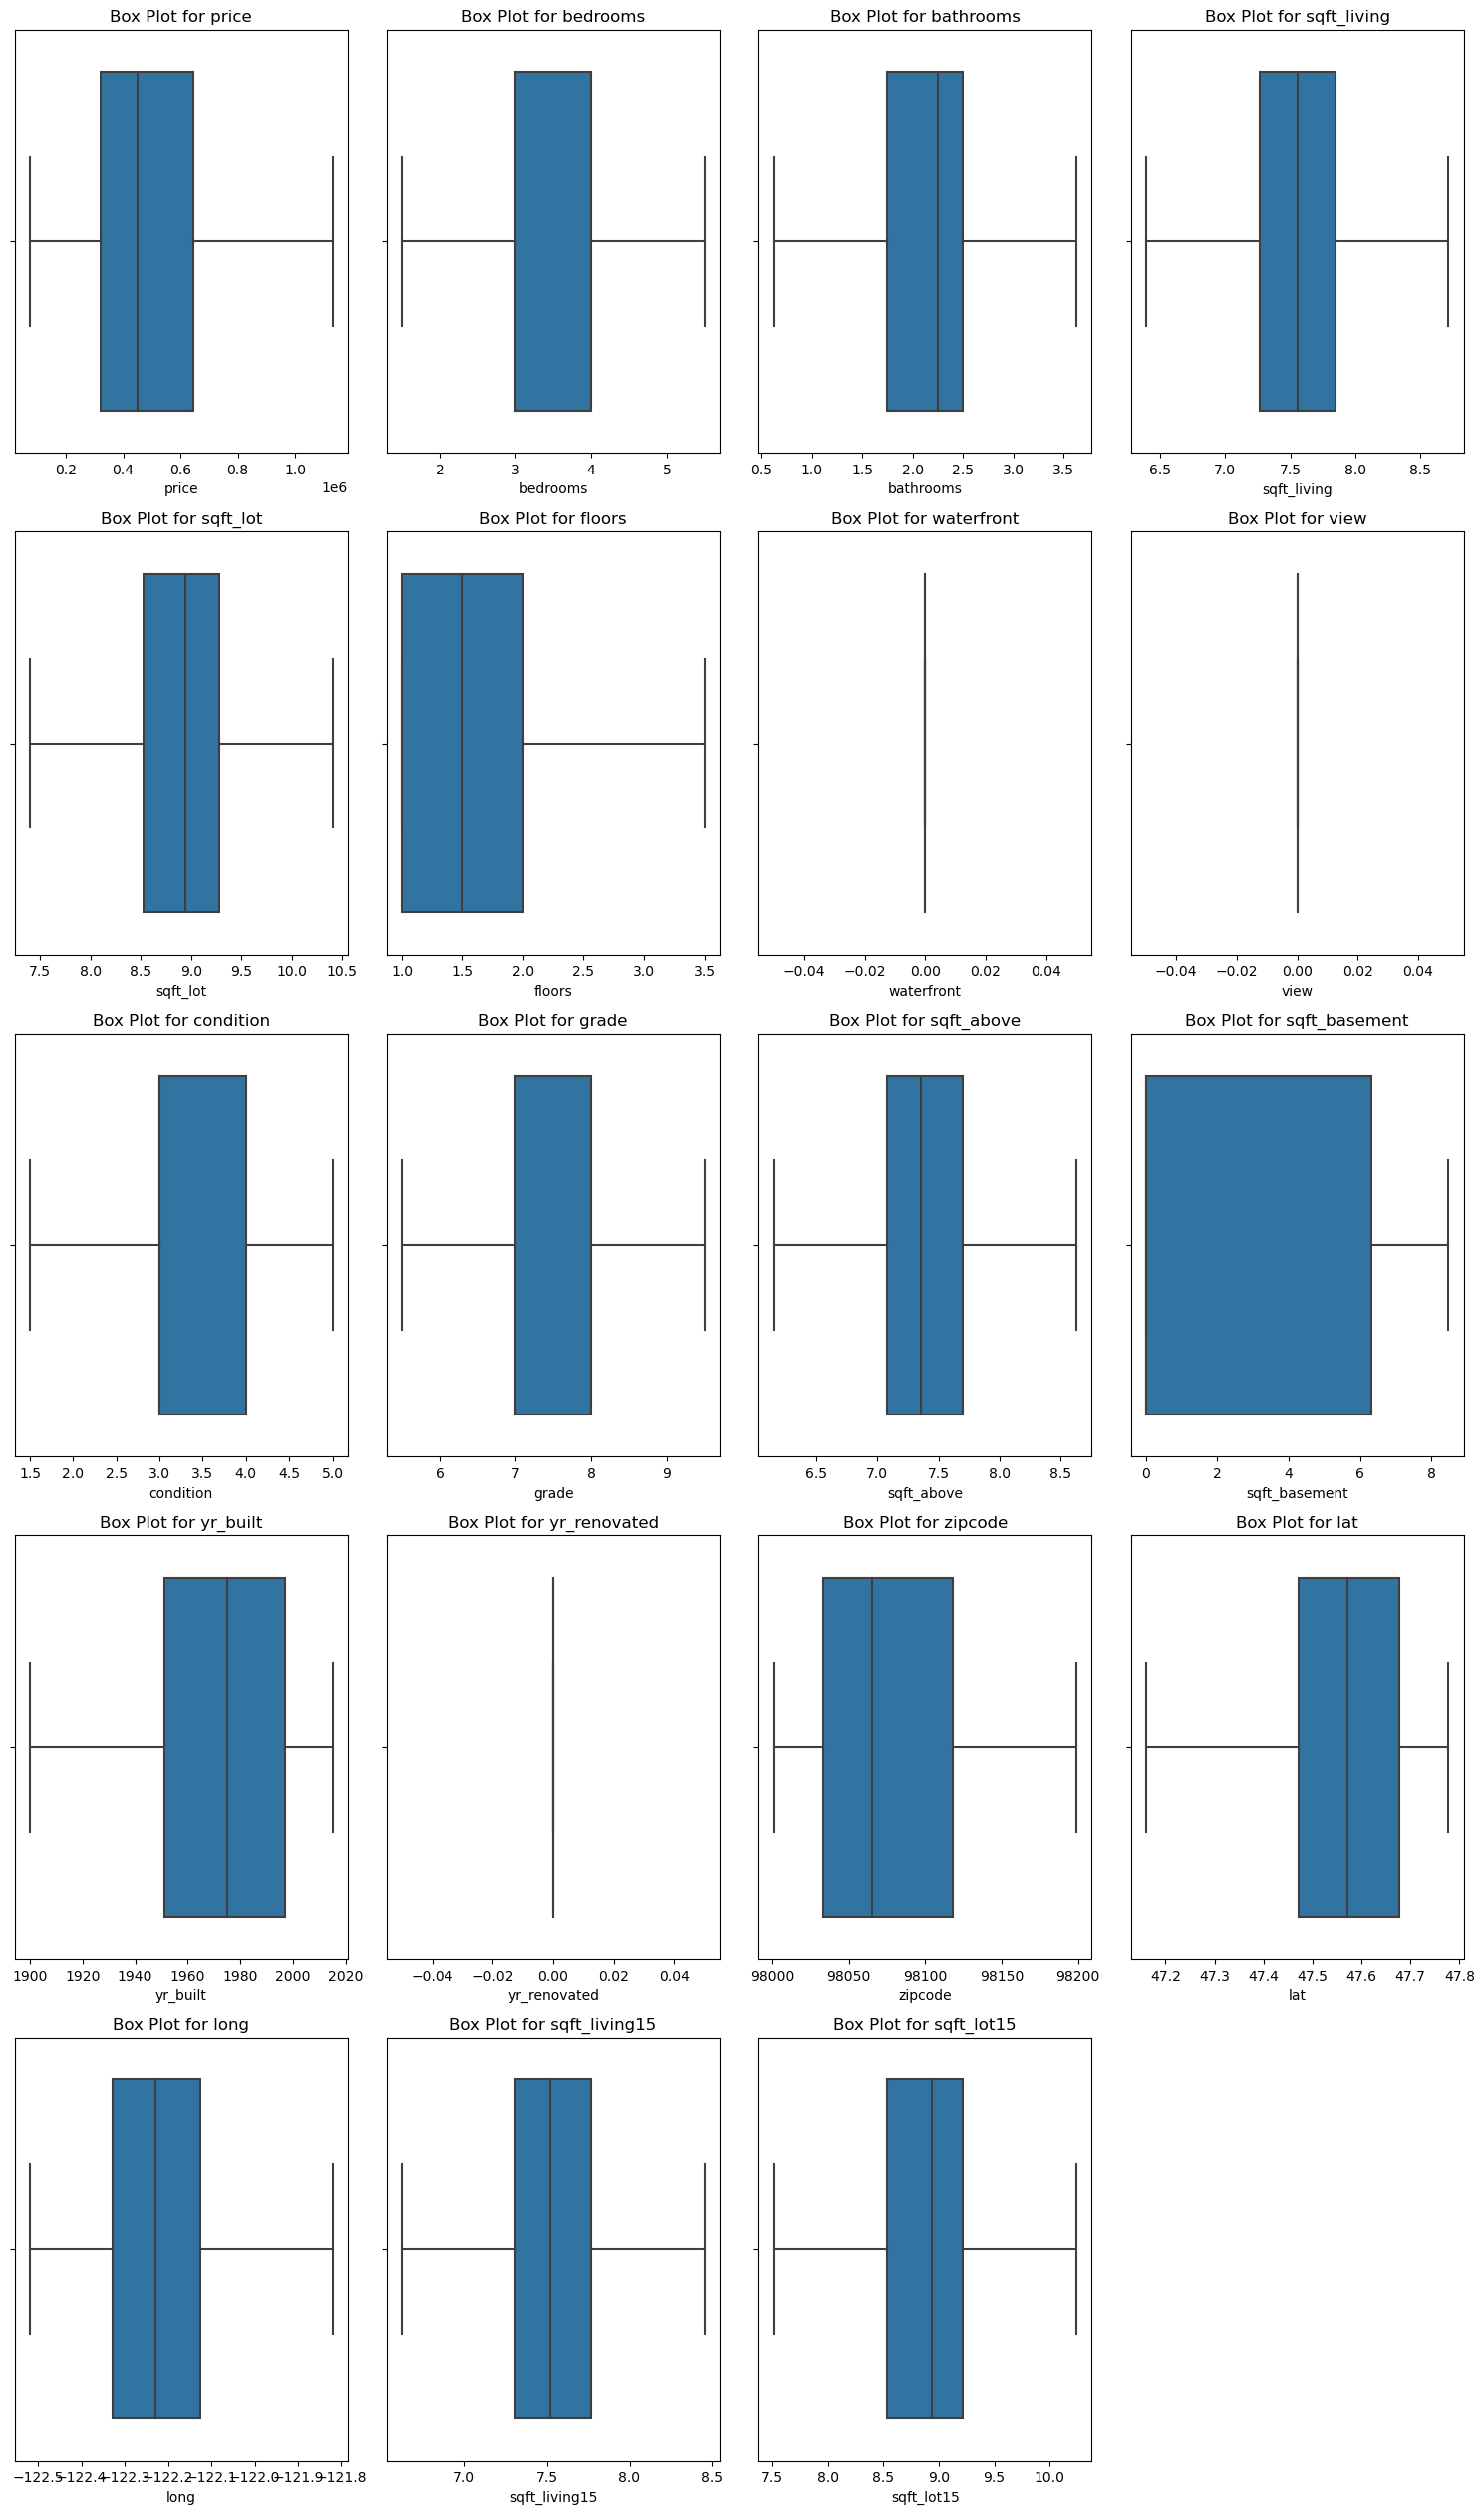

In [25]:
numerical_features = df2.select_dtypes(include=['number'])
num_features = len(numerical_features.columns)
num_rows = 8  
num_cols = 4  
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 40))
axes = axes.flatten()
for i, column in enumerate(numerical_features.columns):
    if i < num_features:
        sns.boxplot(x=df2[column], ax=axes[i])
        axes[i].set_title(f'Box Plot for {column}')
for i in range(len(numerical_features.columns), len(axes)):
    fig.delaxes(axes[i])
    plt.tight_layout()

# Show the plots
plt.show()

In [26]:
df2.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'house-width-category',
       'tense-category'],
      dtype='object')

In [27]:
df2 = df2.drop(columns=['yr_renovated', 'view','waterfront'])

In [28]:
df3 = df2.copy()

In [29]:
from sklearn.preprocessing import LabelEncoder

# Select the columns correctly
obj_col = df3[['house-width-category', 'tense-category']]

encoder = LabelEncoder()

# Iterate over each column and apply LabelEncoder
for col in obj_col.columns:
    df3[col] = encoder.fit_transform(df3[col])

In [30]:
df3.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,house-width-category,tense-category
0,2014-10-13,221900.0,3.0,1.00,7.074117,8.639588,1.0,3.0,7.0,7.074117,0.000000,1955,98178.0,47.5112,-122.257,7.201171,8.639588,2,2
1,2014-12-09,538000.0,3.0,2.25,7.852050,8.887791,2.0,3.0,7.0,7.682943,5.993961,1951,98125.0,47.7210,-122.319,7.433075,8.941153,2,2
2,2015-02-25,180000.0,2.0,1.00,6.647688,9.210440,1.0,3.0,6.0,6.647688,0.000000,1933,98028.0,47.7379,-122.233,7.908755,8.995041,0,2
3,2014-12-09,604000.0,4.0,3.00,7.581210,8.517393,1.0,5.0,7.0,6.957497,6.814543,1965,98136.0,47.5208,-122.393,7.215975,8.517393,2,1
4,2015-02-18,510000.0,3.0,2.00,7.427144,8.997271,1.0,3.0,8.0,7.427144,0.000000,1987,98074.0,47.6168,-122.045,7.496097,8.923191,2,1


# Machine Learning

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score ,roc_curve, auc, roc_auc_score
from sklearn.model_selection import cross_val_score, KFold, train_test_split

In [32]:
X = df[['grade', 'sqft_living', 'sqft_living15', 'sqft_above', 'bathrooms', 'bedrooms', 'lat','floors' , 'long']]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression

In [33]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [34]:
pred = lin_reg.predict(X_test)

In [35]:
import hvplot.pandas
pd.DataFrame({'Error Values': (y_test - pred)}).hvplot.kde()

:Distribution   [Error Values]   (Density)

In [36]:
from sklearn import metrics
def print_evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted) 
    mse = metrics.mean_squared_error(true, predicted) 
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted) 
    print('MAE:', mae) 
    print('MSE:', mse) 
    print('RMSE:', rmse) 
    print('R2 Square', r2_square) 
    print('__________________________________') 
def evaluate(true, predicted): 
    mae = metrics.mean_absolute_error(true, predicted) 
    mse = metrics.mean_squared_error(true, predicted) 
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted)) 
    r2_square = metrics.r2_score(true, predicted) 
    return mae, mse, rmse, r2_square

In [37]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n')
print_evaluate(y_train, train_pred)

results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , ]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])

Test set evaluation:

MAE: 144458.34098931926
MSE: 56845885084.48909
RMSE: 238423.75109139
R2 Square 0.6239772367326974
__________________________________
Train set evaluation:

MAE: 140561.46345360196
MSE: 49486500821.00259
RMSE: 222455.6153955269
R2 Square 0.6212244477786308
__________________________________


# KNN Regression

In [38]:
knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train,y_train)

KNeighborsRegressor()

In [39]:
pred = knn_reg.predict(X_test)

In [40]:
pd.DataFrame({'Error Values': (y_test - pred)}).hvplot.kde()

:Distribution   [Error Values]   (Density)

In [41]:
test_pred = knn_reg.predict(X_test)
train_pred = knn_reg.predict(X_train)

print('Test set evaluation:\n')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n')
print_evaluate(y_train, train_pred)

results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , ]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])

Test set evaluation:

MAE: 174095.74827665972
MSE: 74719145091.5126
RMSE: 273348.02924387914
R2 Square 0.5057496357999826
__________________________________
Train set evaluation:

MAE: 136233.262891845
MSE: 42542889870.25763
RMSE: 206259.27826465803
R2 Square 0.6743716703270989
__________________________________


# Ridge Regression

In [42]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=0.1, solver='cholesky', tol=0.01, random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_test, test_pred) ]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:

MAE: 144456.73019844678
MSE: 56846119527.03485
RMSE: 238424.24274187148
R2 Square 0.6239756859479089
__________________________________
Train set evaluation:

MAE: 140559.69318115752
MSE: 49486501654.80096
RMSE: 222455.61726960493
R2 Square 0.6212244413966392
__________________________________


C:\Users\PC\AppData\Local\Temp\ipykernel_15920\1676766969.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


In [43]:
pd.DataFrame({'Error Values': (y_test - pred)}).hvplot.kde()

:Distribution   [Error Values]   (Density)